# Introduction 

This dataset(https://archive.ics.uci.edu/ml/datasets/Incident+management+process+enriched+event+log) is from UCI ML repository  event log was extracted from data gathered from the audit system of an instance of the ServiceNow platform used by an IT company and enriched with data loaded from a relational database.In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at defnition of each column of the dataset:-

1. number: incident identifier (24,918 different values);
2. incident state: eight levels controlling the incident management process transitions from opening until closing the case;
3. active: boolean attribute that shows whether the record is active or closed/canceled;
4. reassignment_count: number of times the incident has the group or the support analysts changed;
5. reopen_count: number of times the incident resolution was rejected by the caller;
6. sys_mod_count: number of incident updates until that moment;
7. made_sla: boolean attribute that shows whether the incident exceeded the target SLA;
8. caller_id: identifier of the user affected;
9. opened_by: identifier of the user who reported the incident;
10. opened_at: incident user opening date and time;
11. sys_created_by: identifier of the user who registered the incident;
12. sys_created_at: incident system creation date and time;
13. sys_updated_by: identifier of the user who updated the incident and generated the current log record;
14. sys_updated_at: incident system update date and time;
15. contact_type: categorical attribute that shows by what means the incident was reported;
16. location: identifier of the location of the place affected;
17. category: first-level description of the affected service;
18. subcategory: second-level description of the affected service (related to the first level description, i.e., to category);
19. u_symptom: description of the user perception about service availability;
20. cmdb_ci: (confirmation item) identifier used to report the affected item (not mandatory);
21. impact: description of the impact caused by the incident (values: 1â€“High; 2â€“Medium; 3â€“Low);
22. urgency: description of the urgency informed by the user for the incident resolution (values: 1â€“High; 2â€“Medium; 3â€“Low);
23. priority: calculated by the system based on 'impact' and 'urgency';
24. assignment_group: identifier of the support group in charge of the incident;
25. assigned_to: identifier of the user in charge of the incident;
26. knowledge: boolean attribute that shows whether a knowledge base document was used to resolve the incident;
27. u_priority_confirmation: boolean attribute that shows whether the priority field has been double-checked;
28. notify: categorical attribute that shows whether notifications were generated for the incident;
29. problem_id: identifier of the problem associated with the incident;
30. rfc: (request for change) identifier of the change request associated with the incident;
31. vendor: identifier of the vendor in charge of the incident;
32. caused_by: identifier of the RFC responsible by the incident;
33. close_code: identifier of the resolution of the incident;
34. resolved_by: identifier of the user who resolved the incident;
35. resolved_at: incident user resolution date and time (dependent variable);
36. closed_at: incident user close date and time (dependent variable).

First, let's read in the data and necessary libraries.

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./incident_event_log.csv')
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


Let us examine the rows and columns in the dataset,There are 141712 rows with 36 columns and there is no missing values as checked below.

In [175]:
df.shape

(141712, 36)

In [176]:
df_closed.isnull().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

Here is the distribution of different state of incidents in the data

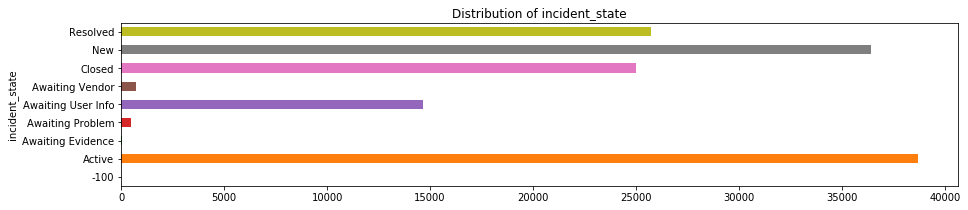

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64

In [177]:
df.groupby('incident_state') \
    .count()['number'] \
    .plot(kind='barh',
          title='Distribution of incident_state',
          figsize=(15, 3))
plt.show()
df['incident_state'].value_counts()

Filtering out only closed incidents for our analysis as the incident can be in other state for multiple time and closed will be the final state which will give us the unique incident.

In [178]:
df_closed = df["incident_state"] == "Closed"
df_closed = df[df_closed]

Let us see the data types of each variable, only three variables are numeric rest are charatcer and bool.

In [179]:
df_closed.dtypes 

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

Let us see the stats of numeric variables

In [180]:
df_closed.describe()

,reassignment_count,reopen_count,sys_mod_count
count,24985.000000,24985.000000,24985.000000
mean,0.941765,0.013368,6.694417
std,1.573962,0.149116,8.548757
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,2.000000
50%,0.000000,0.000000,4.000000
75%,1.000000,0.000000,8.000000
max,27.000000,8.000000,129.000000


# Question 1 - What types of incidents are getting reopened?

Incidents are reassigned and reopend sometimes, maximum reassigment is 27 whereas there are incidents which are reopened 8 times.Let us first see that with what close codes incidents are getting closed

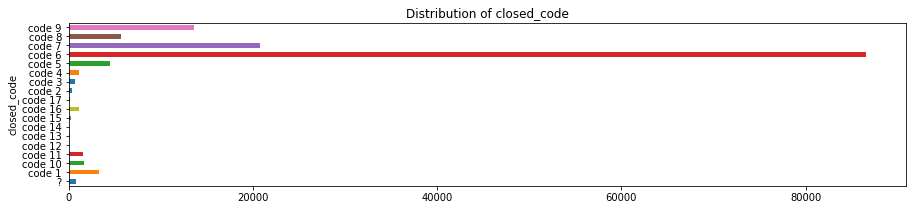

code 6     86583
code 7     20733
code 9     13562
code 8      5646
code 5      4469
code 1      3265
code 10     1678
code 11     1493
code 4      1139
code 16     1091
?            714
code 3       608
code 2       349
code 15      183
code 17      115
code 13       59
code 12       13
code 14       12
Name: closed_code, dtype: int64

In [181]:
df.groupby('closed_code') \
    .count()['number'] \
    .plot(kind='barh',
          title='Distribution of closed_code',
          figsize=(15, 3))
plt.show()
df['closed_code'].value_counts()

Close code 6,7,8,9 are the major ones with which the incidents are getting closed.Now let us check if that happens for the ones which are getting reopened or it is different?

In [182]:
df_closed_reo = df_closed["reopen_count"] > 0
df_closed_reo = df_closed[df_closed_reo]

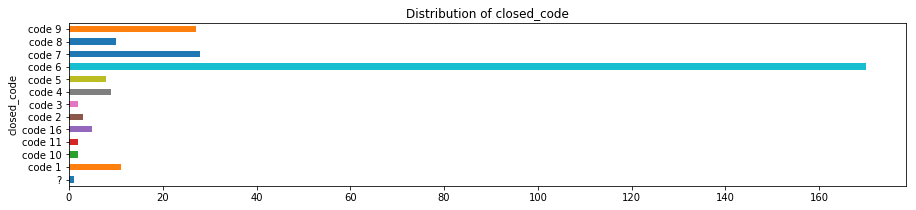

code 6     170
code 7      28
code 9      27
code 1      11
code 8      10
code 4       9
code 5       8
code 16      5
code 2       3
code 11      2
code 10      2
code 3       2
?            1
Name: closed_code, dtype: int64

In [183]:
df_closed_reo.groupby('closed_code') \
    .count()['number'] \
    .plot(kind='barh',
          title='Distribution of closed_code',
          figsize=(15, 3))
plt.show()
df_closed_reo['closed_code'].value_counts()

We can see the close code are similar for reopened tickets but we see that there are other close codes too which are ending as reason to close the reopened tickets. Let us now see if these reopened has any pattern with SLA.

In [184]:
df_closed['made_sla'].value_counts()

True     15831
False     9154
Name: made_sla, dtype: int64

In [185]:
df_closed_reo['made_sla'].value_counts()

False    210
True      68
Name: made_sla, dtype: int64

We can see here that SLAs are missed in most of the reopened incidents so if the tickets are getting reopened then there is high chance that SLAs will be missed.

Let us now examine if there are different symptoms for reopened incidents.

In [186]:
df_closed['u_symptom'].value_counts()

Symptom 491    9272
?              5856
Symptom 534    1670
Symptom 116     485
Symptom 387     426
Symptom 4       375
Symptom 506     355
Symptom 532     353
Symptom 571     282
Symptom 296     207
Symptom 105     200
Symptom 118     195
Symptom 208     173
Symptom 470     165
Symptom 10      158
Symptom 295     154
Symptom 120     150
Symptom 517     142
Symptom 102     141
Symptom 127     136
Symptom 54      135
Symptom 87      129
Symptom 458     125
Symptom 494     123
Symptom 6        94
Symptom 70       93
Symptom 117      87
Symptom 592      86
Symptom 65       85
Symptom 119      84
               ... 
Symptom 362       1
Symptom 207       1
Symptom 309       1
Symptom 545       1
Symptom 330       1
Symptom 210       1
Symptom 179       1
Symptom 29        1
Symptom 400       1
Symptom 450       1
Symptom 275       1
Symptom 314       1
Symptom 73        1
Symptom 204       1
Symptom 327       1
Symptom 496       1
Symptom 555       1
Symptom 542       1
Symptom 12        1


In [187]:
df_closed_reo['u_symptom'].value_counts()

Symptom 491    104
?               58
Symptom 532     12
Symptom 534      9
Symptom 4        7
Symptom 296      5
Symptom 458      5
Symptom 208      4
Symptom 10       4
Symptom 465      4
Symptom 114      4
Symptom 387      3
Symptom 116      3
Symptom 119      3
Symptom 9        3
Symptom 134      2
Symptom 315      2
Symptom 120      2
Symptom 117      2
Symptom 87       2
Symptom 455      2
Symptom 494      2
Symptom 6        2
Symptom 65       2
Symptom 54       2
Symptom 596      1
Symptom 463      1
Symptom 118      1
Symptom 127      1
Symptom 474      1
Symptom 592      1
Symptom 544      1
Symptom 8        1
Symptom 410      1
Symptom 218      1
Symptom 381      1
Symptom 517      1
Symptom 256      1
Symptom 273      1
Symptom 462      1
Symptom 506      1
Symptom 548      1
Symptom 531      1
Symptom 486      1
Symptom 70       1
Symptom 471      1
Symptom 217      1
Symptom 102      1
Symptom 198      1
Symptom 358      1
Symptom 257      1
Symptom 371      1
Symptom 105 

Symptoms are also very similar to other incidents as for reopened so there is no clear pattern with close code and symptoms but we can see that incase of reopened incidents the SLAs get missed.

# Question 2 - What kind of incidents are missing the SLAs?

Now as we see that reopened incidents are missing SLAs so now let us exmaine distribution of incidents which are missing SLAs

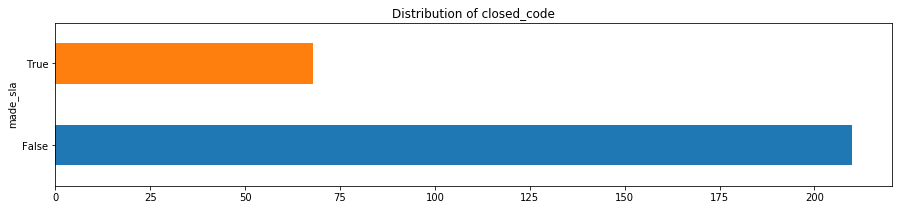

True     15831
False     9154
Name: made_sla, dtype: int64

In [188]:
df_closed_reo.groupby('made_sla') \
    .count()['number'] \
    .plot(kind='barh',
          title='Distribution of closed_code',
          figsize=(15, 3))
plt.show()
df_closed['made_sla'].value_counts()

Around 37% incidents are missing SLAs so now let us see what kind of incidents usually miss SLAs

In [189]:
df_closed_sla = df_closed["made_sla"] == 1
df_closed_sla = df_closed[df_closed_sla]

In [190]:
pd.crosstab(df_closed['made_sla'],df_closed['priority'])

priority,1 - Critical,2 - High,3 - Moderate,4 - Low
made_sla,,,,
False,265,406,8358,125
True,6,2,15171,652


There is very clear pattern that if SLAs mostly get missed for critical and high priortiy incidents whereas SLAs are met for Moderate and Low priortiy incidents.

# Question 3 - What features are important to predict the close code?

Based on the given incident data, let us see which features can help us to predict the close code so that incidents can be assigned to relevant team based on the predicted close code. First let us filter out the relevant features

In [191]:
df_closed_1 = df_closed.loc[:,['reassignment_count','reopen_count','sys_mod_count','made_sla','location','category','subcategory','u_symptom','priority','vendor']]

As we have only categorical variables s0 for each of the categorical variables, we now need to create dummy columns.

In [192]:
df_closed_dummy = pd.get_dummies(df_closed_1)

In [193]:
df_closed_dummy.head()

,reassignment_count,reopen_count,sys_mod_count,made_sla,location_?,location_Location 10,location_Location 100,location_Location 101,location_Location 102,location_Location 105,...,u_symptom_Symptom 96,u_symptom_Symptom 97,u_symptom_Symptom 99,priority_1 - Critical,priority_2 - High,priority_3 - Moderate,priority_4 - Low,vendor_?,vendor_Vendor 1,vendor_code 8s
3,0,0,4,True,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
12,1,0,8,True,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
19,0,0,6,True,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
23,0,0,3,True,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
31,1,0,7,False,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [194]:
df_closed_dummy['closed_code']= df_closed['closed_code']

Let us Split into explanatory and response variables

In [195]:
Y = df_closed_dummy['closed_code']
X = df_closed_dummy.drop(columns=['closed_code'])

In [196]:
X.head()

,reassignment_count,reopen_count,sys_mod_count,made_sla,location_?,location_Location 10,location_Location 100,location_Location 101,location_Location 102,location_Location 105,...,u_symptom_Symptom 96,u_symptom_Symptom 97,u_symptom_Symptom 99,priority_1 - Critical,priority_2 - High,priority_3 - Moderate,priority_4 - Low,vendor_?,vendor_Vendor 1,vendor_code 8s
3,0,0,4,True,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
12,1,0,8,True,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
19,0,0,6,True,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
23,0,0,3,True,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
31,1,0,7,False,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


We will fit random forest model to check which features are coming as important for predicting the close code.

In [197]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200
                               ,random_state=100)

model.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

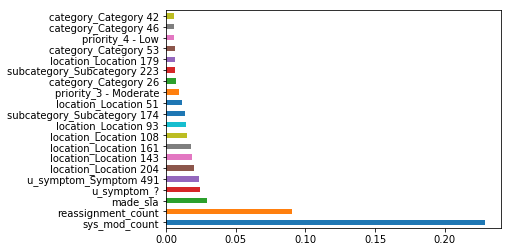

In [198]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

Most important feature that will help us in our prediction is sys_mod_count that is number of incident updates until that moment which makes sense as based on the system updates there will some pattern that what would be best resolution for the given incidents. Next features in reassignment count and if the incident has met SLA or not, symptom and location also coming as important features.